In [24]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [25]:
import pandas as pd
SOURCE = '../notebooks/kc_house_data.csv'
df = pd.read_csv(SOURCE)

In [26]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [27]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.369454      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.907964      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [28]:
df.describe(exclude='number')

date
count             21613
unique              372
top     20140623T000000
freq                142

In [29]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [30]:
from sklearn.model_selection import train_test_split
# Train/Test split
traintest = df.copy()
id = df['id'].unique()
train_id, test_id = train_test_split(id, random_state=42, test_size=.1)

train = traintest[traintest['id'].isin(train_id)]
test = traintest[traintest['id'].isin(test_id)]
train.shape, test.shape

((19449, 21), (2164, 21))

In [31]:
# Wrangle function
def wrangle(X):
    X = X.copy()
    

    X = X.drop(columns =['date', 'view', 'lat', 'long', 'yr_renovated', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot','sqft_lot15', 'zipcode'])
    
    return X
train = wrangle(train)
test = wrangle(test)




In [32]:
import numpy as np

target = 'price'
X_train = train.drop(columns = [target,'id'])
y_train = train[target]
X_test = test.drop(columns=[target, 'id'])
y_test = test[target]

# Log transformation of target vector
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

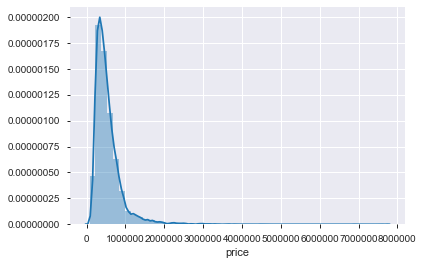

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_train)

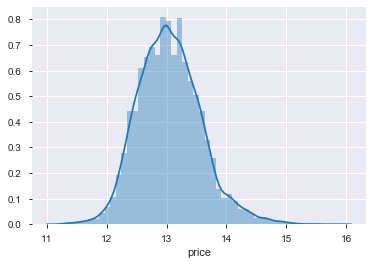

In [34]:
sns.distplot(y_train_log)

In [35]:
trainval = train.copy()
train, val = train_test_split(trainval)
X_train = train.drop(columns=[target, 'id'])
y_train = train[target]
y_train_log = np.log1p(y_train)
X_val = val.drop(columns=[target, 'id'])
y_val = val[target]
y_val_log = np.log1p(y_val)

In [36]:
# XGBRegressor wih early stopping rounds
import warnings
import category_encoders as ce
from xgboost import XGBRegressor
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=10)

[06:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.3058	validation_1-rmse:11.3072
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:10.1769	validation_1-rmse:10.1781
[2]	validation_0-rmse:9.16104	validation_1-rmse:9.16176
[3]	validation_0-rmse:8.24681	validation_1-rmse:8.24734
[4]	validation_0-rmse:7.42404	validation_1-rmse:7.42493
[5]	validation_0-rmse:6.6837	validation_1-rmse:6.68435
[6]	validation_0-rmse:6.01751	validation_1-rmse:6.01811
[7]	validation_0-rmse:5.41811	validation_1-rmse:5.41895
[8]	validation_0-rmse:4.8788	validation_1-rmse:4.87939
[9]	validation_0-rmse:4.39359	validation_1-rmse:4.39437
[10]	validation_0-rmse:3.95711	validation_1-rmse:3.95785
[11]	validation_0-rmse:3.5645	validation_1-rmse:3.56521
[12]	validation_0-rmse:3.21145	validation_1-rmse:3.212

[136]	validation_0-rmse:0.295527	validation_1-rmse:0.301438
[137]	validation_0-rmse:0.295463	validation_1-rmse:0.301418
[138]	validation_0-rmse:0.295425	validation_1-rmse:0.301527
[139]	validation_0-rmse:0.295409	validation_1-rmse:0.301511
[140]	validation_0-rmse:0.295378	validation_1-rmse:0.301514
[141]	validation_0-rmse:0.295352	validation_1-rmse:0.301556
[142]	validation_0-rmse:0.295338	validation_1-rmse:0.301549
[143]	validation_0-rmse:0.295286	validation_1-rmse:0.301607
[144]	validation_0-rmse:0.295239	validation_1-rmse:0.301574
[145]	validation_0-rmse:0.295192	validation_1-rmse:0.301545
[146]	validation_0-rmse:0.295133	validation_1-rmse:0.3015
[147]	validation_0-rmse:0.295078	validation_1-rmse:0.301471
Stopping. Best iteration:
[137]	validation_0-rmse:0.295463	validation_1-rmse:0.301418



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train_encoded, y_train_log)
feature_names = X_train_encoded.columns.tolist()
show_weights(permuter, top=None, feature_names=feature_names)

In [38]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [39]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(ce.OrdinalEncoder(),
            XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=645,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
)
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)



[06:39:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.3031450564108366

In [40]:
y_pred_log = pipeline.predict(X_test)
y_pred=np.expm1(y_pred_log)

In [41]:
# Get the test error (one time, at the end)
X_test_encoded = encoder.transform(X_test)
y_pred_log = model.predict(X_test_encoded)
print('Test RMSLE:', rmse(y_test_log, y_pred_log))

Test RMSLE: 0.30388602731247927


In [42]:
y_pred = np.expm1(y_pred_log)
rmse(y_test, y_pred)

182044.19870561498

In [43]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_pred,y_test))

0.6259405712207513


In [44]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [45]:
def predict(beds,baths,sqft,floor, water, cond, grade, yr):
    df = pd.DataFrame(
        columns=['bedrooms', 'bathrooms','sqft_living','floors', 'waterfront', 'condition', 'grade', 'yr_built'],
        data=[[ beds, baths, sqft, floor, water, cond, grade, yr]]
    )
    y_pred_log=pipeline.predict(df)[0]
    y_pred = np.expm1(y_pred_log)

    return y_pred

predict(3, 3, 1972, 1, 1, 4, 7, 1956)

567338.1